# Notebook 
# Analyses morphométriques

L'objectif d'une analyse morphométrique est d'extraire des **mesures ou quantités** d'intérêt à partir d'images structurelles acquises avec l'**IRM**
- L'exemple ci-contre s'intéresse plus particulièrement au contraste d'une image pondérée en **T1** puisqu'elle donne un bon contraste entre la matière grise, la matière blanche et le liquide céphalo-rachidien
 

### L'intérêt des visualisations dans le contexte d'analyses morphométriques

- Contrôle de qualité
- Visualiser les structures du cerveau
- Cartes statistiques


### Comment en arriver à des visualisations?

#### 1. Importer des librairies 
Ici, nous travaillerons principalement avec la librairie nilearn
 
####  2. Importer des données: IRM pondérées en T1
Nous utiliserons des base de données accès ouvert disponibles sur le Web qui permettent d'avoir accès à différents types d'images ET aux informations phénotypes des sujets. Ces images ont même parfois déjà été prétraitées (dans le cas du OASIS-3 dataset par exemple)

#### 3. Écrire quelques lignes de code
Nous appellerons les **fonctions prédéfinies** des librairies et sous-modules importées et changeront quelques paramètres. Nous devrons déterminer la valeur de ces paramètres.

#### 4. Exécuter le code
Cette partie est très simple: il suffit de "SHIFT' + 'ENTER' le code de la cellule que nous souhaitons exécuter.
Et voilà, nous accédons aux représentations visuelles.  

## Volumétrie

#### Cette section permettra la visualisation d'images statiques et dynamiques du volume du cerveau

### 1. Importation des librairies et sous-modules


In [241]:
from nilearn import plotting
from nilearn import datasets 
from nilearn.datasets import MNI152_FILE_PATH
from nilearn.plotting import plot_anat
from nilearn.plotting import plot_img
from nilearn.image import smooth_img #lissage spatiale

### 2. Importer une image IRM pondérée en T1

*Notez ici qu'on réutilise le même template que la semaine précédente, soit le Montreal Neurological Institute (MNI) qui est une image T1 moyennée à partir de 27 sujets*

In [217]:
mni = datasets.fetch_icbm152_2009()
mni_mask = MNI152_FILE_PATH
mni.keys()

dict_keys(['description', 'csf', 'gm', 'wm', 'pd', 't1', 't2', 't2_relax', 'eye_mask', 'face_mask', 'mask'])

### 3. Quelques lignes de code

##### Visualisation du volume du cerveau 

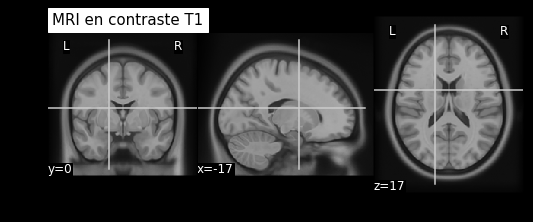

In [219]:
plot_anat(anat_img=mni.t1, cut_coords=[-17, 0, 17],title='MRI en contraste T1')

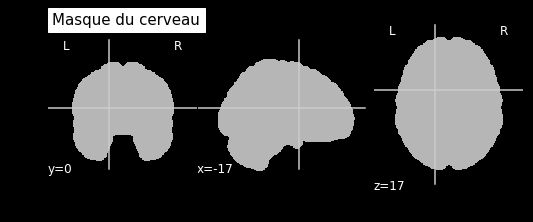

In [220]:
plot_anat(anat_img=mni.mask, cut_coords=[-17, 0, 17],title='Masque du cerveau')

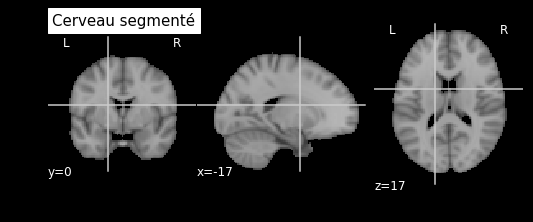

In [222]:
plot_anat(anat_img=mni_mask, cut_coords=[-17, 0, 17],title='Cerveau segmenté')

Visualisation interactive du cerveau segmenté

In [231]:
view = plotting.view_img(mni_mask, bg_img=None, title='Visualisation interactive du volume du cerveau', cmap='gray', symmetric_cmap=False, 
                         black_bg=True, threshold=None)

view.save_as_html('volume.html')

/home/anproulx/miniconda3/lib/python3.7/site-packages/nilearn/image/resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/anproulx/miniconda3/lib/python3.7/site-packages/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))


**[Ouvrez la visualisation interactive](volume.html)** 

Ici, nous visualisons un cerveau segmenté selon le **Harvard-Oxford atlas** disponible avec nilearn. Il s'agit d'un atlas probabiliste délimitant 48 structures corticales et 21 sous-corticales, dérivés de données et de segmentations structurelles fournies par le Harvard Center for Morphometric Analysis.

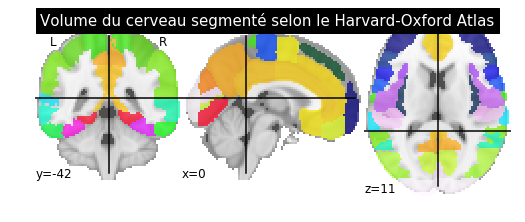

In [240]:
#Importation d'un atlas
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps

plotting.plot_roi(atlas_filename, title="Volume du cerveau segmenté selon le Harvard-Oxford Atlas")
plotting.show()

In [253]:
view = plotting.view_img(atlas_filename, cmap="nipy_spectral")
view.save_as_html('volume_segmente.html')

/home/anproulx/miniconda3/lib/python3.7/site-packages/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))


**[Ouvrez la visualisation interactive](parcellated_volume.html)** 

## Voxel based morphometry (VBM) 

#### Cette section permettra la visualisation statique de la segmentation de tissus (MB/MG/CSF). 

Nous réutilisons ici l'atlas MNI et les modules de librairies importées précédemment. 

### 3. Quelques lignes de code

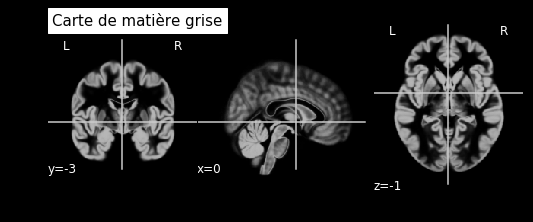

In [172]:
plot_anat(anat_img = mni.gm, display_mode='ortho', title = 'Carte de matière grise')

Visualisation de l'image IRM T1 après lissage spatiale de l'ordre de 5mm

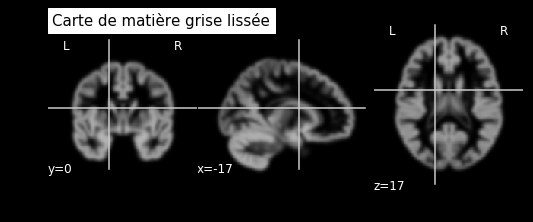

In [249]:
smooth_anat_img = smooth_img(mni.gm, fwhm=5)
plot_anat(smooth_anat_img, cut_coords=[-17, 0, 17],title='Carte de matière grise lissée')

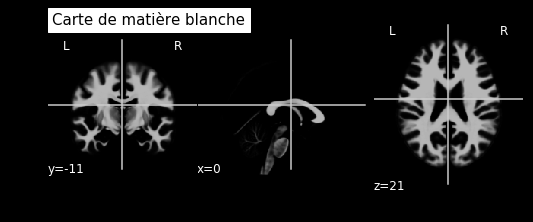

In [250]:
plot_anat(anat_img = mni.wm, display_mode='ortho', title = 'Carte de matière blanche')

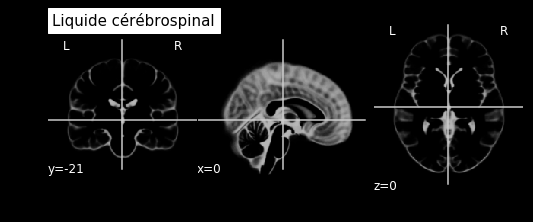

In [175]:
plot_anat(anat_img = mni.csf, display_mode='ortho', title = 'Liquide cérébrospinal')

## Analyse de surface

##### Cette section permettra de visualiser des images statiques et dynamiques de la surface du cerveau. 

Nous utilisons ici des sous-modules ayant déjà été importées. 

### 1. Importer librairies et sous-modules

In [252]:
from nilearn import surface

### 2. Importation de données

On importe l'**atlas Destrieux** disponible avec la librairie nilearn. Cet atlas est largement utilisé dans le monde de FreeSurfer notamment. Il parcelle le cerveau suivant la profondeur des sulcus et il défini précisément et de manière automatisée les gyri et sulci corticaux.

In [126]:
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
parcellation = destrieux_atlas['map_left']

### 3. Quelques lignes de code

Le code ci-contre permet de visualiser la surface du cerveau parcellée selon l'atlas destrieux. 

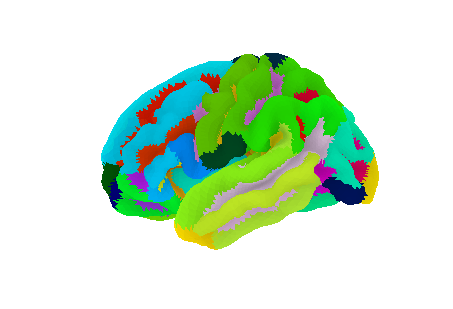

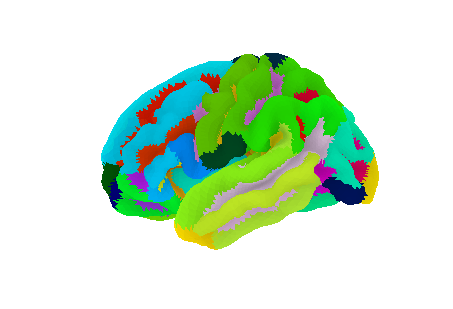

In [178]:
plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=parcellation,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)

In [243]:
view = plotting.view_surf(fsaverage.infl_left, parcellation,
                          cmap='gist_ncar', symmetric_cmap=False)
view.save_as_html('surface.html')

**[Ouvrez la visualisation interactive](surface.html)** 